# Séries de Fourier de tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente



In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

## Motivação

Como visto anteriormente os sinais do tipo:

$x(t) = e^{j\omega t}$

são autofunções de sistemas lineares e invariantes no tempo. Ou seja, a saída de um sistema linear e invariante no tempo para essa entrada é:

$y(t) = H(j\omega)e^{j\omega t}$

em que $H(j\omega)$ é o valor da resposta em frequência do sistema para a frequência angular $\omega$.

Isso faz com que seja interessante descrever um sinal qualquer como uma combinação linear de exponenciais complexas. 

Um tipo de sinal que já vimos ser uma combinação linear de exponenciais complexas é o cosseno:

$\cos(\omega t) = \frac{e^{j\omega t}+ e^{-j\omega t}}{2}$

Em 1807, Joseph Fourier apresentou um método para representar qualquer sinal periódico como uma combinação linear de exponenciais complexas harmonicamente relacionadas.

## Exponenciais complexas harmonicamente relacionadas

Exponenciais harmonicamente relacionadas $\phi_k(t)$ são exponenciais complexas que têm um período $T$ em comum (o termo "harmônico" tem o mesmo significado do empregado em música). Ou seja, são sinais com frequências que são múltiplas da menor frequência encontrada entre os sinais.

$\phi_k(t) = A_ke^{jk\omega_0 t}, k = 0,\pm 1,\pm 2 ...$

Para $k = 0$ o sinal é uma constante e para os outros valores de $k$ a frequência angular do sinal  é $|k|\omega_0$. O período fundamental de um sinal que seja a soma dessas exponenciais harmônicas é:

$T_0 = \frac{2\pi}{\omega_0}$

Os componentes para $k = N$ e $k = -N$ são chamados de N-ésima harmônica. Os componentes para $k=1$ e $k=-1$ são as harmônicas fundamentais.



---

### Exemplo 1

O sinal:

$x(t) = e^{j0t} + e^{j2t} + e^{-j2t} + 2e^{j6t} + 2e^{-j6t} =1 + 0.5\cos(2t) + \cos(6t)$




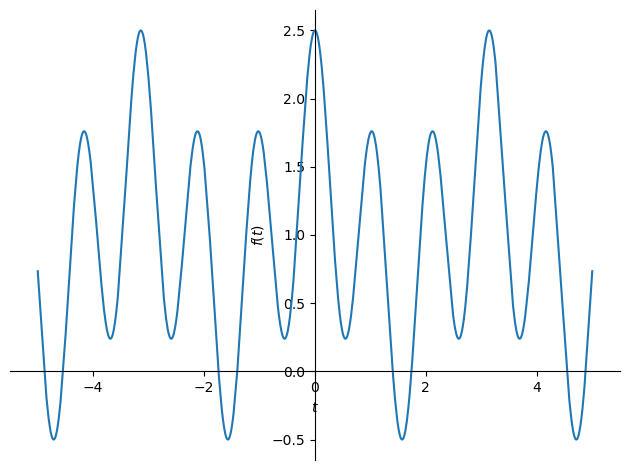

In [6]:
t = sym.symbols('t')
x = 1 + 0.5*sym.cos(2*t) + sym.cos(6*t)
sym.plot(x, (t, -5, 5));

A frequência fundamental é $\omega=2 rad/s$. Com isso o período fundamental é $\pi$ s. De fato, pelo gráfico, o sinal se repete a cada $\pi$ s.

---

Repare também que os coeficientes que multiplicam as exponenciais complexas são números reais. Isso não é obrigatório. Os coeficientes podem ser números complexos também. Porém, para que seja possível reconstruir um cosseno, é necessário que os coeficientes que multiplicam as exponenciais conjugadas uma da outra sejam também complexos conjugados.



---

### Exemplo 2

Considere agora o seguinte sinal:

$x(t) = e^{j0t} + e^{-j\frac{\pi}{3}}e^{j2 t} + e^{j\frac{\pi}{3}}e^{-j2 t} + e^{-j\frac{\pi}{2}}e^{j6 t}+2e^{j\frac{\pi}{2}}e^{-j6 t} = 1 + \cos(2 t - \frac{\pi}{3}) + 2\cos(6 t - \frac{\pi}{2})$

Como é possível observar, quando os coeficientes de cada exponencial complexa são complexos, a fase do cosseno resultante se altera.


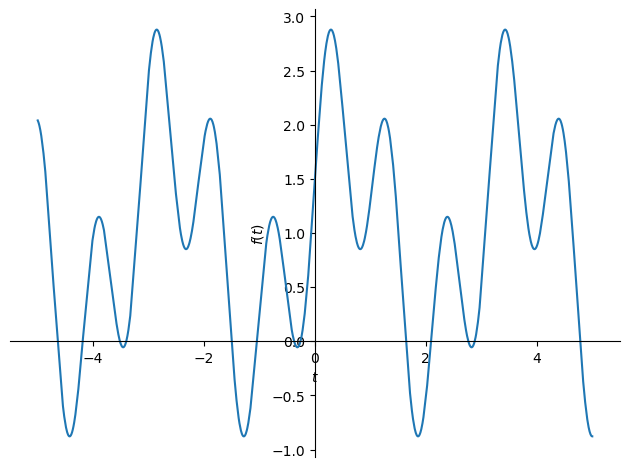

In [10]:
t = sym.symbols('t')
x = 1 + sym.cos(2*t-sym.pi/3) + sym.cos(6*t-sym.pi/2)
sym.plot(x, (t, -5,5));

Isso faz com que o sinal resultante da combinação linear das mesmas exponenenciais complexas seja diferente da do exemplo 1.

## Representação gráfica da magnitude e fase dos coeficientes 

Uma maneira muito comum de representar os coeficientes é de maneira gráfica, com o valor da harmônica na abscissa e o módulo do coeficiente em um gráfico e a fase do coeficiente em outro gráfico.

---

### Exemplo 3

Vamos representar os coeficientes do exemplo 2 de forma gráfica. A harmônica fundamental é $\omega = 2 $ rad/s. Então seus coeficientes estarão em $k=\pm 1$. A constante é $k=0$ e o cosseno de frequência angula 6 rad/s é $k=\pm 3$.



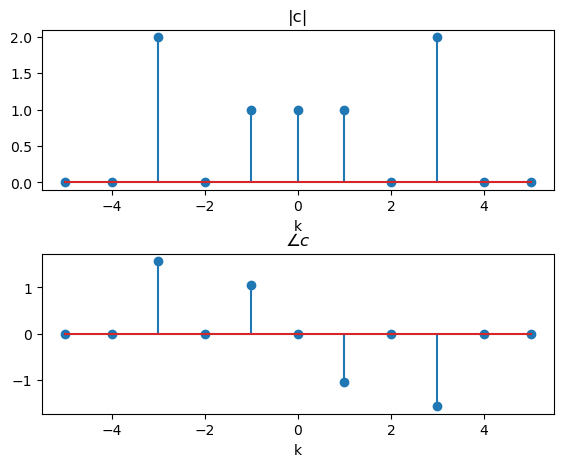

In [21]:
k = np.arange(-5,6,1)
cmod = np.zeros(len(k))
cfase = np.zeros(len(k))

cmod[k==0] = 1
cfase[k==0] = 0

cmod[k==1] = 1
cfase[k==1] = -np.pi/3

cmod[k==-1] = 1
cfase[k==-1] = np.pi/3

cmod[k==3] = 2
cfase[k==3] = -np.pi/2

cmod[k==-3] = 2
cfase[k==-3] = np.pi/2


plt.figure()
plt.subplot(2,1,1)
plt.stem(k, cmod)
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(k, cfase)
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=0.4)
plt.show()

---

Repare que o gráfico do módulo dos coeficientes é uma função par e o gráfico da fase dos coeficientes é uma função ímpar. Isso sempre vai acontecer com sinais reais.

## Determinação dos coeficientes multiplicando cada harmônica

Supondo que um sinal periódico qualquer possa ser decomposto em uma soma de exponenciais complexas, quais são os coeficientes que multiplicam cada exponencial complexa. É isso que o método desenvolvido por Joseph Fourier respondeu e hoje é conhecido como **série de Fourier**.

Vamos supor que um sinal periódico $x(t)$ possa ser decomposto em soma de exponenciais complexas. Nesse caso, $x(t)$ pode escrito como:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk2\pi f_0 t}$

em que $f_0$ é a frequência fundamental do sinal.

O objetivo aqui é encontrar o valor de $c_k$, para todo $k$. Para isso, vamos multiplicar ambos os lados por $e^{jn2\pi f_0 t}$:

$x(t)e^{-jn2\pi f_0 t} = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk2\pi f_0 t}e^{-jn2\pi f_0 t} \rightarrow x(t)e^{-jn2\pi f_0 t} = \displaystyle\sum_{k=-\infty}^\infty c_ke^{j(k-n)2\pi f_0 t}$

Como $x(t)$ periódico, com um período $T = \frac{1}{f_0}$, vamos integrar ambos os lados da igualdade por um período $T$ do sinal:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt = \int_T\displaystyle\sum_{k=-\infty}^\infty c_ke^{j(k-n)2\pi f_0 t}\,dt$

Como a variável de integração é diferente da somatória, podemos mudar a ordem em que a somatória e a integral aparecem:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt = \displaystyle\sum_{k=-\infty}^\infty c_k\int_Te^{j(k-n)2\pi f_0 t}\,dt$


A integral do lado direito pode ser analisada em duas situações diferentes. A primeira, quando $k\neq n$,  está integrando em um período do sinal:

 $\int_T e^{j(k-n)2\pi f_0 t}\,dt = \left.\frac{e^{j(k-n)2\pi f_0 t}}{j(k-n)2\pi f_0 }\right|_{t=0}^T = 0$


A segunda situação, quando $n = k$:

$\int_T e^{j(k-n)2\pi f_0 t}\,dt = \int_T \,dt = T$

Então, a integral do lado direito da igualdade só vai ser diferente de zero quando $k=n$. Então:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt =  c_nT$

Com isso, o coeficiente $c_n$ pode ser obtido por:

$\boxed{c_n = \frac{1}{T}\int_T x(t)e^{-jn2\pi f_0 t}\,dt}$

Perceba que o coeficiente $c_0$ corresponde à média do sinal $x(t)$. 

$c_0 = \frac{1}{T}\int_T x(t)\,dt$

O valor de $c_0$ é comumente chamado de **valor DC** (direct current) ou **offset** do sinal.


### Exemplo 3

Vamos calcular os coeficientes da série de Fourier da onda quadrada com período $T=2$ s mostrada no gráfico abaixo:

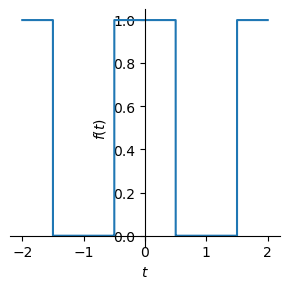

In [29]:
t = sym.symbols('t')
x = sym.Piecewise((1, (t>-0.5)&(t<0.5)),
                  (1, (t>-2.5)&(t<-1.5)),
                  (1, (t>1.5)&(t<2.5)),
                  (0, True))
sym.plot(x, (t, -2,2), size=(3,3));

Vamos obter os coeficientes $c_n$ da série de Fourier:

$c_n = \frac{1}{T}\int_T x(t)e^{-jn\pi t}\,dt = 0.5\int_{-0.5}^{0.5} e^{-jn\pi t}\,dt = \left.0.5\frac{e^{-jn\pi t}}{-jn\pi }\right|_{t=-0.5}^{0.5} = 0.5\left(\frac{e^{-jn\pi 0.5}-e^{jn\pi 0.5}}{-jn\pi} \right) = \left(\frac{e^{jn\pi 0.5}-e^{-jn\pi 0.5}}{2jn\pi} \right) = \frac{\mathrm{sen}\left(\frac{\pi}{2}n\right)}{n\pi}$

Quando $n=0$ essa expressão não é definida. Então vamos calcular separadamente $c_0$:

$c_0=0.5\int_{-0.5}^{0.5} \,dt = 0.5$





O gráfico do módulo e fase dos coeficientes da série quadrada é:

/tmp/ipykernel_921080/4071178821.py:2: RuntimeWarning: invalid value encountered in divide
  c = np.sin(np.pi/2*n)/(n*np.pi)


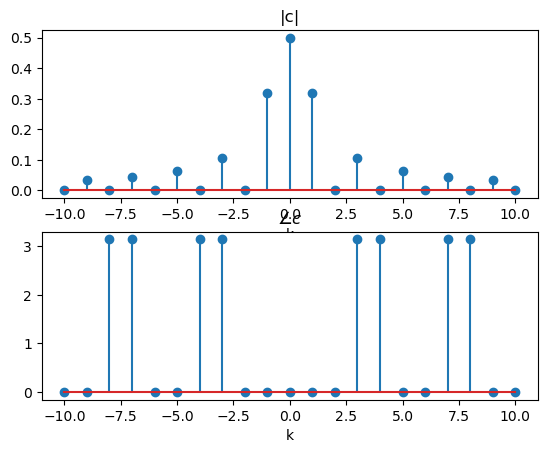

In [28]:
n = np.arange(-10,11)
c = np.sin(np.pi/2*n)/(n*np.pi)
c[n==0] = 0.5
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1)
plt.show()

---
## Exemplo  4


Considere agora a onda triangular com período $T=2$ s:

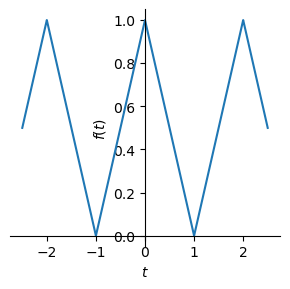

In [47]:

t = sym.symbols('t')
x = sym.Piecewise((t+1, (t>=-1)&(t<0)),
                  (-t+1, (t>=0)&(t<1)),
                  ((t-2)+1, (t>=1)&(t<2)),
                  ((-t-2)+1, (t>=-2)&(t<-1)),
                  ((-t+2)+1, (t>=2)&(t<3)),
                  ((t+2)+1, (t>=-3)&(t<-2)),
                  (0, True))
sym.plot(x, (t, -2.5,2.5), size=(3,3));

Vamos agora calcular os coeficientes $c_n$ da série de Fourier deste sinal:

$c_n = \frac{1}{T}\int_T x(t)e^{-jn2\pi f_0 t}\,dt = 0.5\int_{-1}^0(t+1)e^{-jn\pi t}\,dt + 0.5\int_{0}^1(-t+1)e^{-jn\pi t}\,dt$

Separando as integrais:

$c_n= 0.5\left(\int_{-1}^0te^{-jn\pi t}\,dt + \int_{-1}^0e^{-jn\pi t}\,dt+ \int_{0}^1-te^{-jn\pi t}\,dt+\int_{0}^1e^{-jn\pi t}\,dt\right) =  0.5\left(\int_{-1}^0te^{-jn\pi t}\,dt + \int_{0}^1-te^{-jn\pi t}\,dt+\int_{-1}^1e^{-jn\pi t}\,dt\right)$

Vamos calcular cada uma das integrais separadamente:

As duas primeiras integrais, resolvemos pelo método de integral por partes:

$\int_{-1}^0te^{-jn\pi t}\,dt = \left.\frac{te^{-jn\pi t}}{-jn\pi}\right|_{t=-1}^0 - \int_{-1}^0\frac{e^{-jn\pi t}}{-jn\pi}\,dt = \frac{e^{jn\pi}}{jn\pi} + \left.\frac{1}{jn\pi}\frac{e^{-jn\pi t}}{-jn\pi }\right|_{t=-1}^{0} = \frac{e^{jn\pi}}{jn\pi} + \frac{1}{n^2\pi^2}(1-e^{jn\pi})$

$\int_{0}^1te^{-jn\pi t}\,dt = \left.\frac{te^{-jn\pi t}}{-jn\pi}\right|_{t=0}^1 - \int_{0}^1\frac{e^{-jn\pi t}}{-jn\pi}\,dt = \frac{e^{-jn\pi}}{-jn\pi} + \left.\frac{1}{jn\pi}\frac{e^{-jn\pi t}}{-jn\pi }\right|_{t=0}^{1} = \frac{e^{-jn\pi}}{-jn\pi} + \frac{1}{n^2\pi^2}(e^{-jn\pi}-1)$

$\int_{-1}^1e^{-jn\pi t}\,dt = \left.\frac{e^{-jn\pi t}}{-jn\pi}\right|_{t=-1}^1 = \frac{e^{jn\pi}-e^{-jn\pi}}{jn\pi} = \frac{2}{n\pi}\mathrm{sen}(\pi n)$

Então:

$c_n = 0.5\left(\frac{e^{jn\pi}}{jn\pi} + \frac{1}{n^2\pi^2}(1-e^{jn\pi}) - \frac{e^{-jn\pi}}{-jn\pi} - \frac{1}{n^2\pi^2}(e^{-jn\pi}-1) + \frac{2}{n\pi}\mathrm{sen}(\pi n)\right) = 0.5\left(\cos(n\pi)(\frac{1}{jn\pi}- \frac{1}{n^2\pi^2})+ \frac{2}{n^2\pi^2} + \frac{2}{n\pi}\mathrm{sen}(\pi n)\right)$

Para $c_0$ a expressão acima não é válida (divisão por zero). Então, temos que calcular $c_0$ separadamente:

$c_0 = \frac{1}{2}\int_{-1}^1x(t)\,dt = 1$


/tmp/ipykernel_921080/248991949.py:2: RuntimeWarning: invalid value encountered in divide
  c = 2*np.sin(np.pi*n)/(n*np.pi) + np.cos(np.pi*n)/(n**2*np.pi**2)
/tmp/ipykernel_921080/248991949.py:2: RuntimeWarning: divide by zero encountered in divide
  c = 2*np.sin(np.pi*n)/(n*np.pi) + np.cos(np.pi*n)/(n**2*np.pi**2)


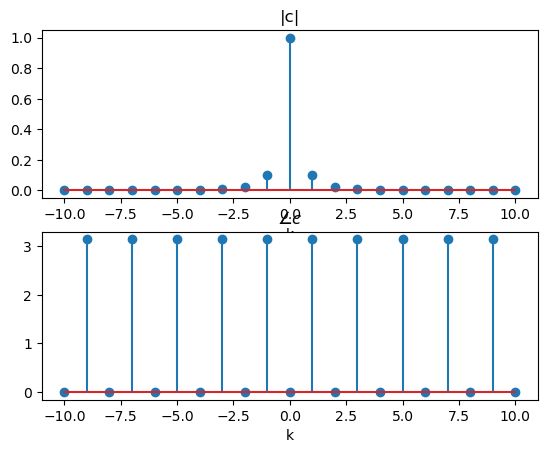

In [48]:
n = np.arange(-10,11)
c = 2*np.sin(np.pi*n)/(n*np.pi) + np.cos(np.pi*n)/(n**2*np.pi**2)
c[n==0] = 1
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1)
plt.show()

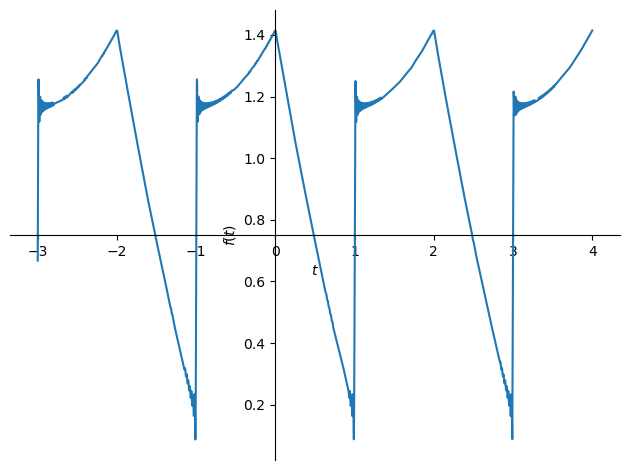

In [57]:
t = sym.symbols('t')
x = 0*t
for k in range(-100, 101):
    if k != 0:
        c = 0.5*(2*np.sin(np.pi*k)/(k*np.pi) + 2/(k**2*np.pi**2)+np.cos(np.pi*k)*(-1/(k**2*np.pi**2)+1/(1j*k*np.pi)))
    else:
        c = 1
    x = x + c*sym.exp(sym.I*k*2*sym.pi*0.5*t)

sym.plot(x, (t, -3, 4))



## Exercícios

## Referências


- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010